In [87]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sys
from tqdm import tqdm
sys.path.append('..')
import analysis.result as r
from utils.persistent_data_class import ExpData, ImageDataset

In [119]:
heatmap = np.load('/home/avic/om2/OODOG/experiments/exp12/10_fully_seen/run0/eval/results/full_heatmap.npy')

In [124]:
exp_data = ExpData.from_job_i(project_path, storage_path, 240)

In [129]:
exp_data.eval_data.full_validation_correct.arr.mean()

0.5219

In [120]:
np.nanmean(heatmap)

0.5200689602621251

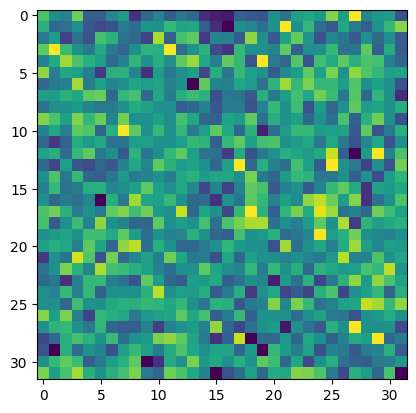

In [121]:
plt.imshow(np.nanmean(heatmap, axis=2), vmin=0, vmax=1)

In [2]:
project_path = '/home/avic/OOD_Orientation_Generalization/'
storage_path = '/home/avic/om2/OODOG/'

In [3]:
exps = pd.read_csv(os.path.join(project_path, 'exps.csv'), comment='#')

In [13]:
ID = ImageDataset('/home/avic/om2/OODOG/', 'plane', 32)

In [17]:
ID.subdatasets[0].annotation_file.df

RangeIndex(start=0, stop=32775, step=1)

In [27]:
from PIL import Image

In [61]:
heatmap = Result.from_exp_data(ExpData.from_num(project_path, storage_path, 0, 20, 0), project_path).partial_heatmap.arr.mean(axis=2)

In [65]:
(16 * 164) / 32

82.0

In [69]:
expanded_heatmap = np.broadcast_to(heatmap[:, np.newaxis, :, np.newaxis], (32, 82, 32, 82)).reshape(32 * 82, 32 * 82)

In [52]:
images = np.stack([np.array(Image.open(p).crop((30, 30, 224-30, 224-30))) for p in ID.subdatasets[0].annotation_file.df.iloc[selections].image_name])

In [88]:
airplane_grid = np.moveaxis(images.reshape(16, 16, 164, 164), 1, 2).reshape(16 * 164, 16 * 164).astype(float)
airplane_grid[airplane_grid == 0] = np.nan

In [ ]:
plt.close()
_, a = plt.subplots(1, figsize=(50, 50))
a.imshow(expanded_heatmap)
a.imshow(airplane_grid, cmap='gray')

In [10]:
convert_axis_to_int = {'α': 3, 'β': 2, 'γ': 1, 'hole': 3}

In [33]:
from matplotlib.colors import ListedColormap
ListedColormap([[0,0,0,0], [1,0,0,0.5]])

In [ ]:
l = [[None, None]] * 4
for i, row in enumerate(exps[(exps.full_category == 'plane') & (exps.partial_category == 'plane') & (exps.free_axis == 'α')].itertuples()):
    l[i][0] = np.stack([np.stack([Result.from_exp_data(ExpData.from_num(project_path, storage_path, row.Index, num_fully_seen, run), project_path).partial_heatmap.arr for run in range(5)]) for num_fully_seen in [10, 20, 30, 40]]).mean(axis=convert_axis_to_int[row.free_axis] + 1)
    l[i][1] = np.stack([np.stack([Result.from_exp_data(ExpData.from_num(project_path, storage_path, row.Index, num_fully_seen, run), project_path).base_mask.arr for run in range(5)]) for num_fully_seen in [10, 20, 30, 40]]).mean(axis=convert_axis_to_int[row.free_axis] + 1)

In [ ]:
plt.close()
_, axes = plt.subplots(2, 4, figsize=(30, 30))
for x in range(1):
    for y in range(4):
        plt.imshow(l[x][0][y].mean(axis=0), vmin=0, vmax=1)
        plt.imshow(l[x][1][y].mean(axis=0), vmin=0, vmax=1, cmap=ListedColormap([[0,0,0,0], [1,0,0,0.5]]))
        axes[x, y].set_xticks([])
        axes[x, y].set_yticks([])
plt.tight_layout()

In [92]:
import importlib
# import shutil

In [93]:
importlib.reload(r)
Result = r.Result

In [170]:
results = []
exp_datas = []
idxs = {}

for idx in tqdm(exps.iloc[[0, 54]].index):
    for job_i in range(idx * 20, (idx + 1) * 20):
        idxs[(idx, job_i)] = len(results)
        try:
            exp_data = ExpData.from_job_i(project_path, storage_path, job_i)
        except:
            continue
        exp_datas.append(exp_data)
        try:
            results.append(Result.from_job_i(project_path, storage_path, job_i))
        except:
            continue

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00,  4.94it/s]


In [171]:
partial_accuracy_frame = pd.concat([result.partial_accuracy_frame for result in results]).reset_index(drop=True)
full_accuracy_frame = pd.concat([result.full_accuracy_frame for result in results]).reset_index(drop=True)
correlation_frame = pd.concat([result.correlation_frame for result in results]).reset_index(drop=True)
selectivity_frame = pd.concat([result.selectivity_frame for result in results]).reset_index(drop=True)
invariances_frame = pd.concat([result.invariances_frame for result in results]).reset_index(drop=True)
invariances_nans_frame = pd.concat([result.invariances_nans_frame for result in results]).reset_index(drop=True)

In [17]:
sns.set_context("talk")

/tmp/ipykernel_44744/2562773498.py:1: UserWarning: The palette list has more values (10) than needed (2), which may not be intended.
  g = sns.relplot(kind='line',


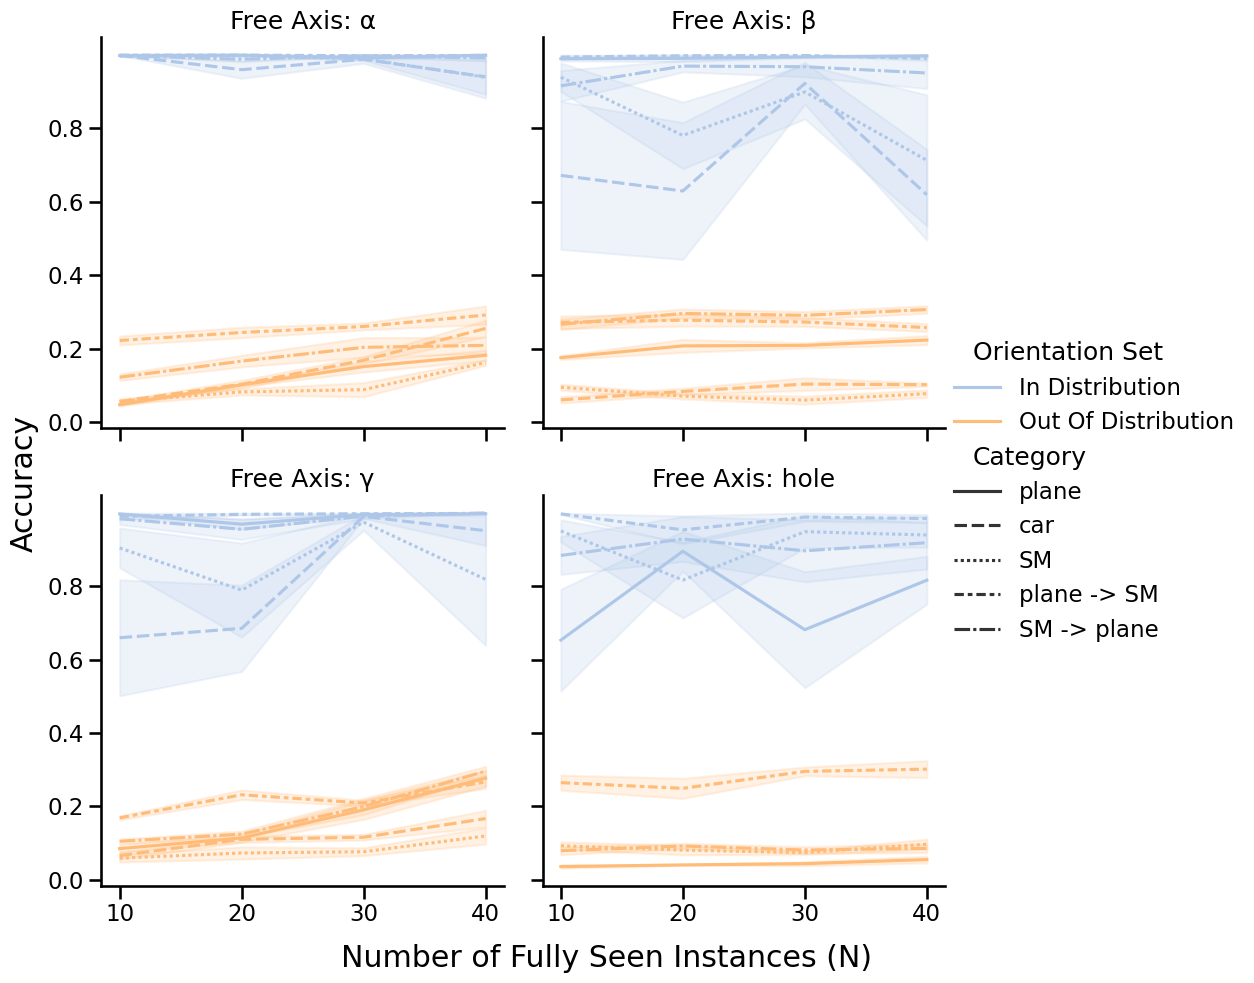

In [14]:
g = sns.relplot(kind='line',
            data=id_ood_accuracy_frame, 
            x='Instances Fully Seen', 
            y='Accuracy', 
            hue='Orientation Set', 
            col='Free Axis', 
            style='Category',
            style_order=['plane', 'car', 'SM', 'plane -> SM', 'SM -> plane'],
            errorbar='se',
            col_wrap=2,
            palette=sns.color_palette('tab20')[1::2])

# g.set_titles('{row_name}, {col_name}')
plt.setp(g.axes.flat, xlabel='', ylabel='', xticks=range(10,50,10), yticks=[0.2 * i for i in range(5)])
g.set_titles(row_template = '{row_name}', col_template = 'Free Axis: {col_name}')
g.fig.supxlabel("Number of Fully Seen Instances (N)")
# g.fig.supylabel("Pearson Correlation (ρ)", x=0.05)
g.fig.supylabel("Accuracy", x=0.04)
plt.savefig('dist_acc.png', transparent=True)

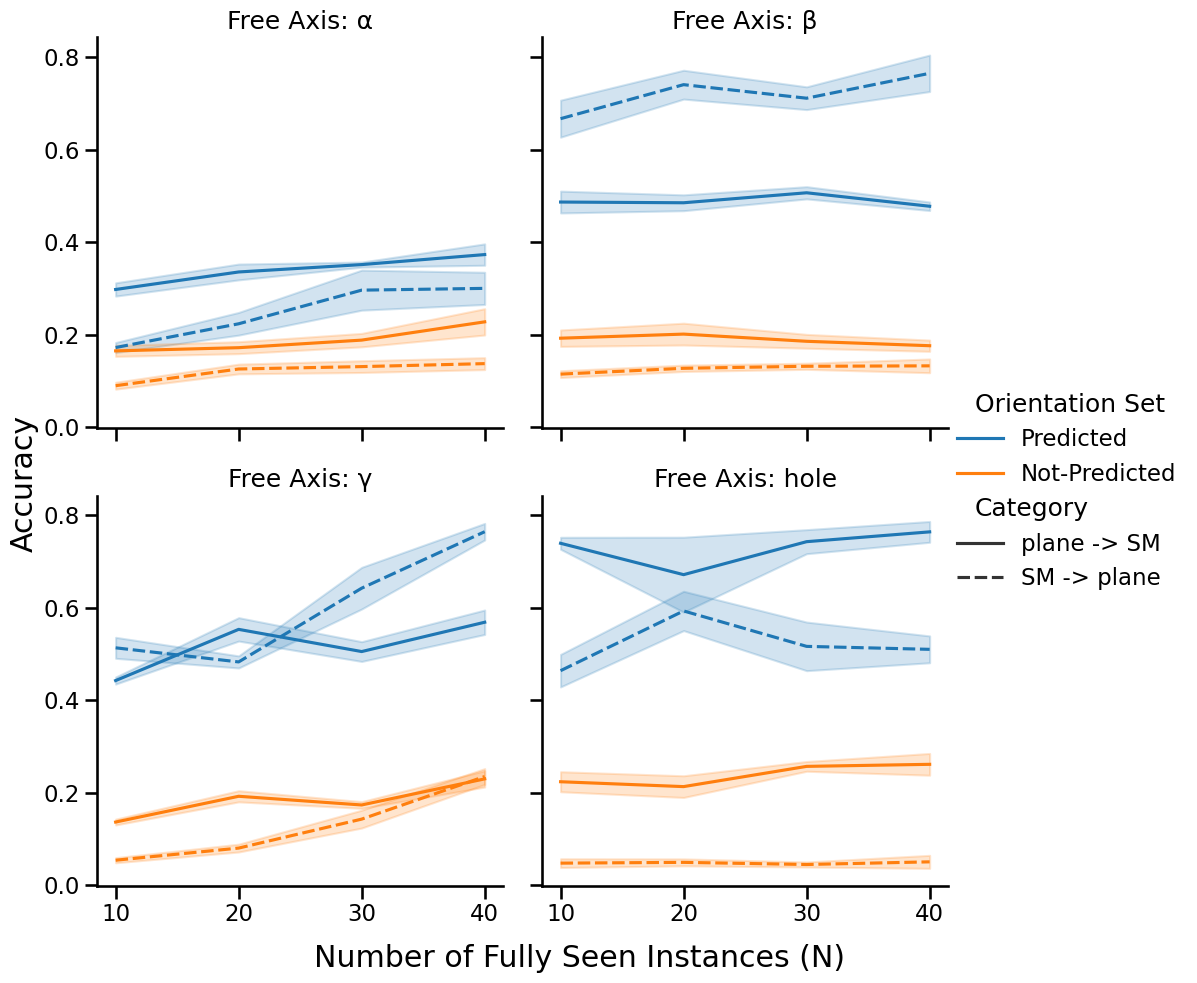

In [32]:
g = sns.relplot(kind='line',
            data=accuracy_frame, 
            x='Instances Fully Seen', 
            y='Accuracy', 
            hue='Orientation Set', 
            col='Free Axis', 
            style='Category',
            # style_order=['plane', 'car', 'SM'],
            style_order=['plane -> SM', 'SM -> plane'],
            errorbar='se',
            col_wrap=2)

# g.set_titles('{row_name}, {col_name}')
plt.setp(g.axes.flat, xlabel='', ylabel='', xticks=range(10,50,10), yticks=[0.2 * i for i in range(5)])
g.set_titles(row_template = '{row_name}', col_template = 'Free Axis: {col_name}')
g.fig.supxlabel("Number of Fully Seen Instances (N)")
# g.fig.supylabel("Pearson Correlation (ρ)", x=0.05)
g.fig.supylabel("Accuracy", x=0.04)
plt.savefig('dist_acc.png', transparent=True)

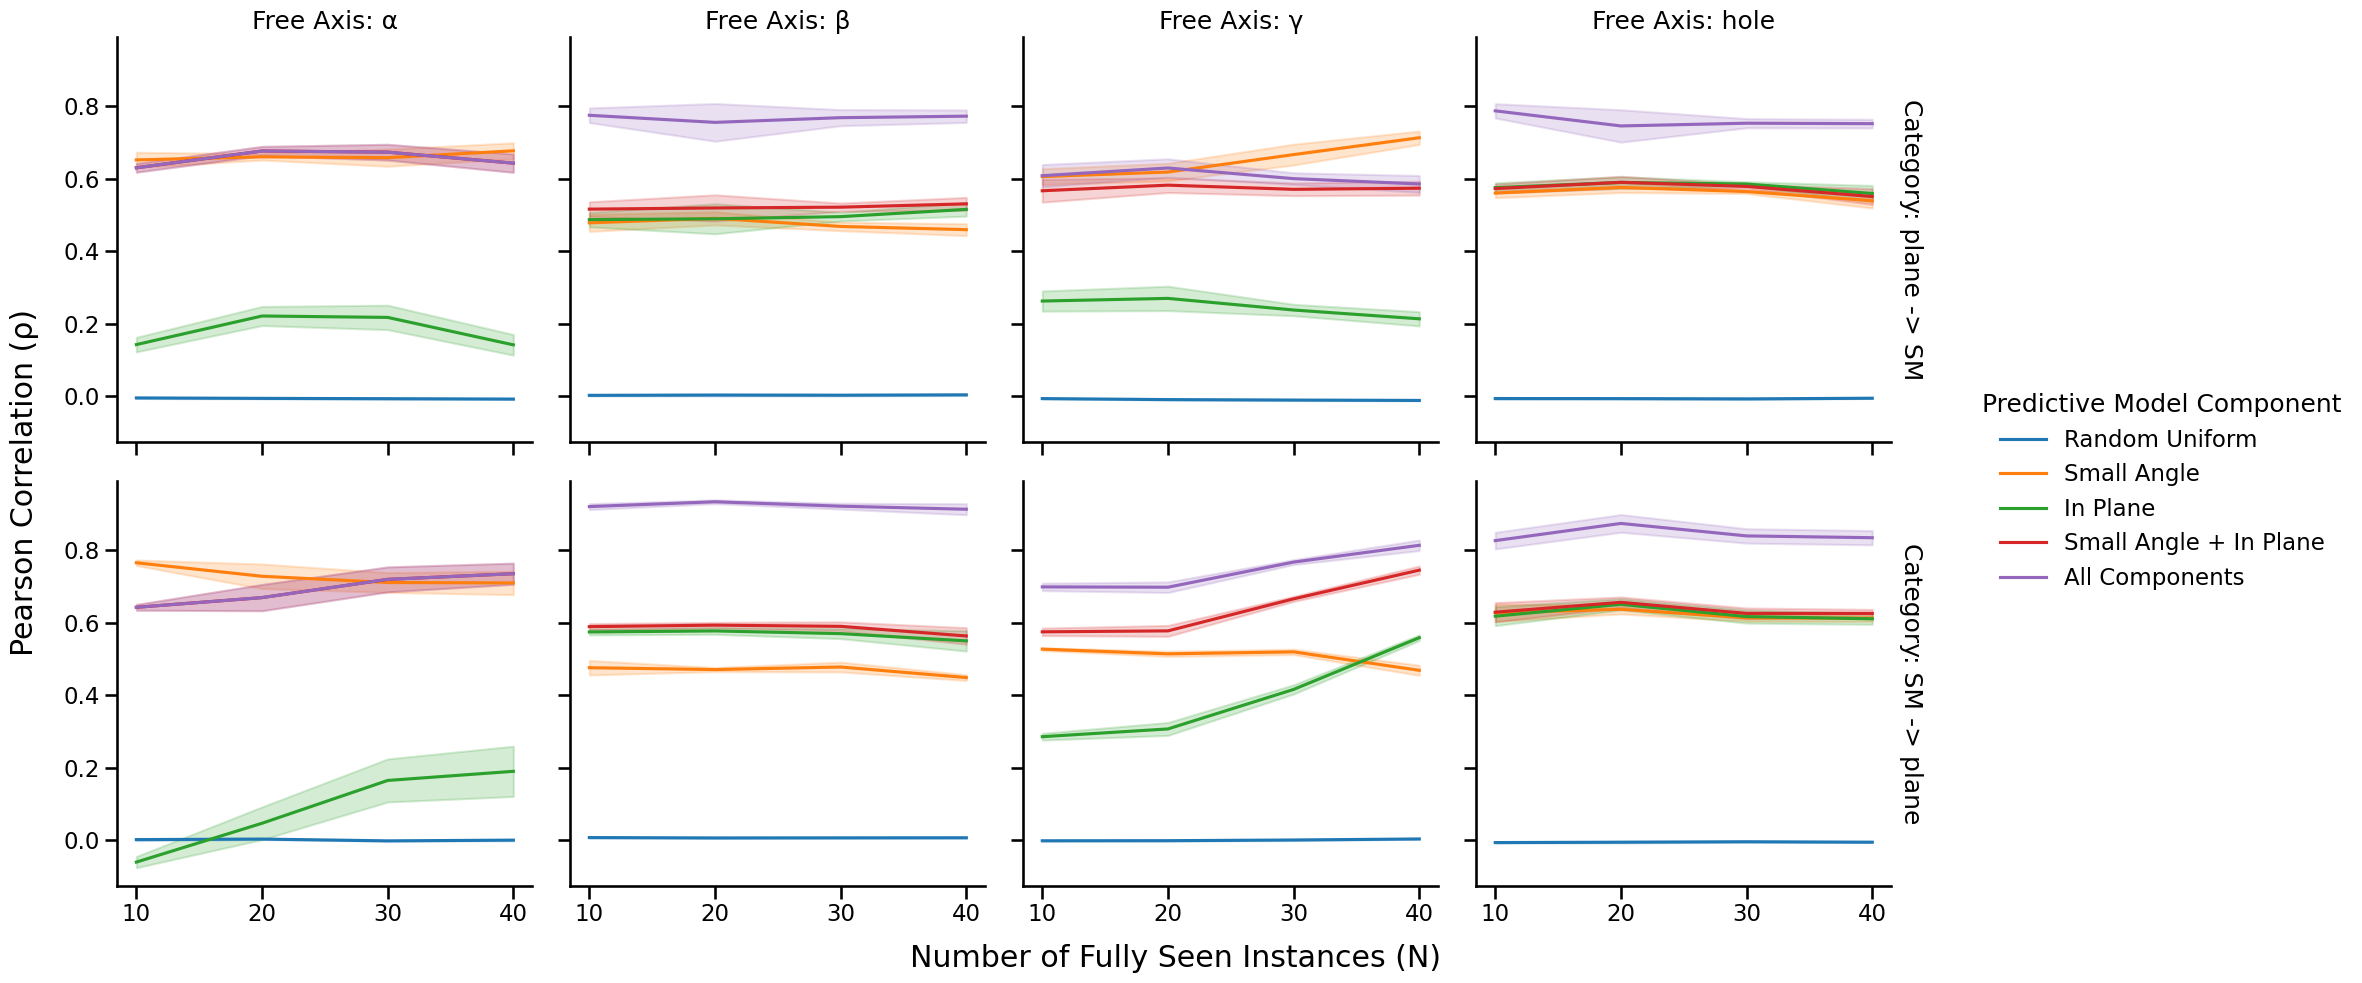

In [33]:
g = sns.relplot(kind='line',
            data=correlation_frame,
            x='Instances Fully Seen', 
            y='Correlation', 
            hue='Predictive Model Component',
            col='Free Axis', 
            row='Category', 
            row_order=['plane -> SM', 'SM -> plane'],
            errorbar='se',
            facet_kws={'margin_titles':True})

# g = sns.FacetGrid(correlation_frame, 
#                   hue='Predictive Model Component', 
#                     col='Free Axis', 
#                     row='Category',
#                   margin_titles=True,
#                  palette=sns.color_palette('tab10')[5:])

# g.map(sns.lineplot, 'Instances Fully Seen', 'Correlation')

# g.set_titles('{row_name}, {col_name}')
[plt.setp(ax.texts, text='') for ax in g.axes.flat]
plt.setp(g.axes.flat, xlabel='', ylabel='', xticks=range(10,50,10), yticks=[0.2 * i for i in range(5)])
g.fig.supxlabel("Number of Fully Seen Instances (N)")
g.fig.supylabel("Pearson Correlation (ρ)", x=0.01)
g.set_titles(row_template = 'Category: {row_name}', col_template = 'Free Axis: {col_name}')
plt.savefig('dist_acc.png', transparent=True)

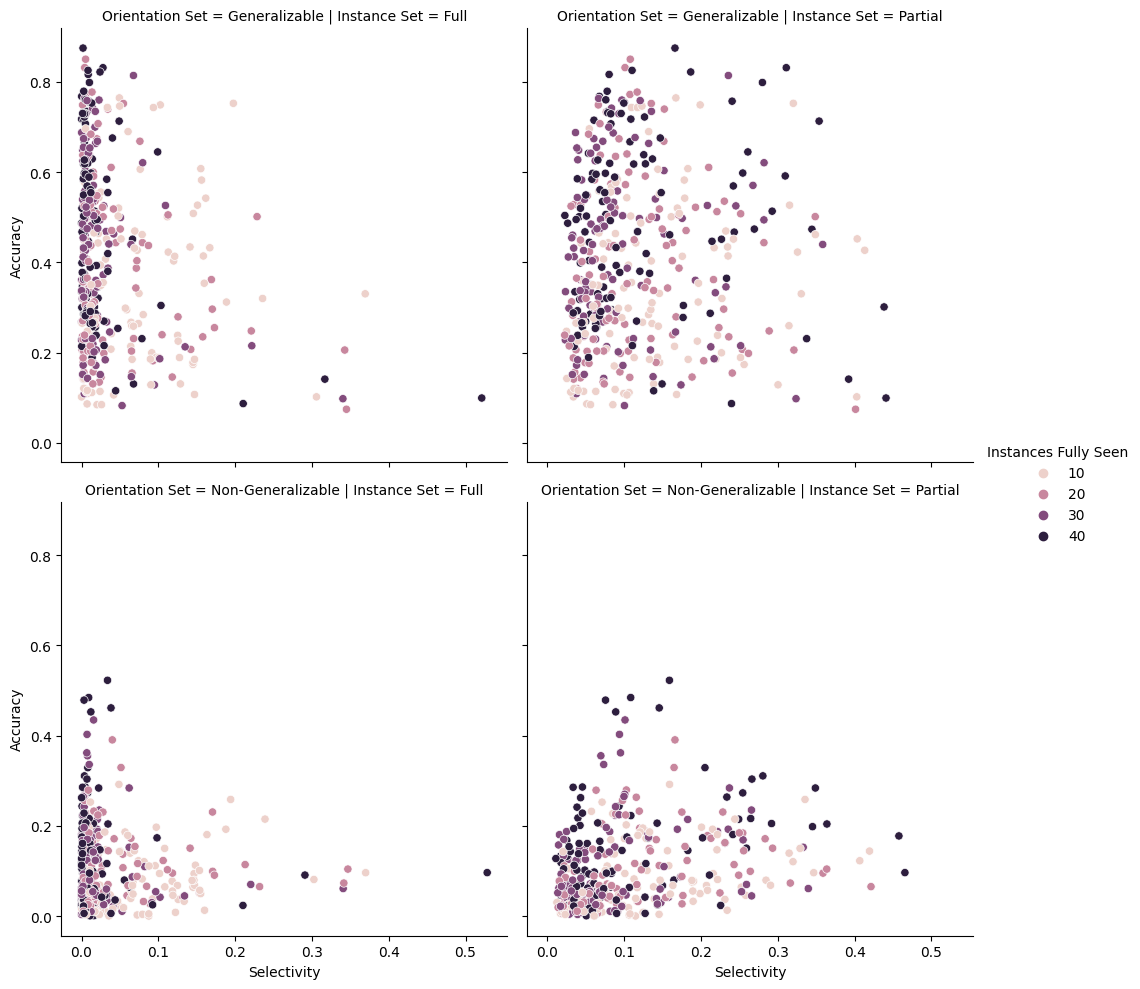

In [20]:
sns.relplot(kind='scatter',
            data=selectivity_frame.merge(accuracy_frame),
            hue='Instances Fully Seen',
            x='Selectivity',
            y='Accuracy',
           row='Orientation Set',
       col='Instance Set',)

In [10]:
selectivity_frame

,Instance Set,Orientation Set,Selectivity,Instances Fully Seen,Run,Free Axis,Category
0,Full,Base,0.199805,10,0,α,plane
1,Partial,Base,0.199805,10,0,α,plane
2,Full,Generalizable,0.199805,10,0,α,plane
3,Full,Non-Generalizable,0.199805,10,0,α,plane
4,Partial,Generalizable,0.199805,10,0,α,plane
...,...,...,...,...,...,...,...
2635,Partial,Base,0.183984,40,4,β,lamp
2636,Full,Generalizable,0.044385,40,4,β,lamp
2637,Full,Non-Generalizable,0.038281,40,4,β,lamp
2638,Partial,Generalizable,0.138281,40,4,β,lamp


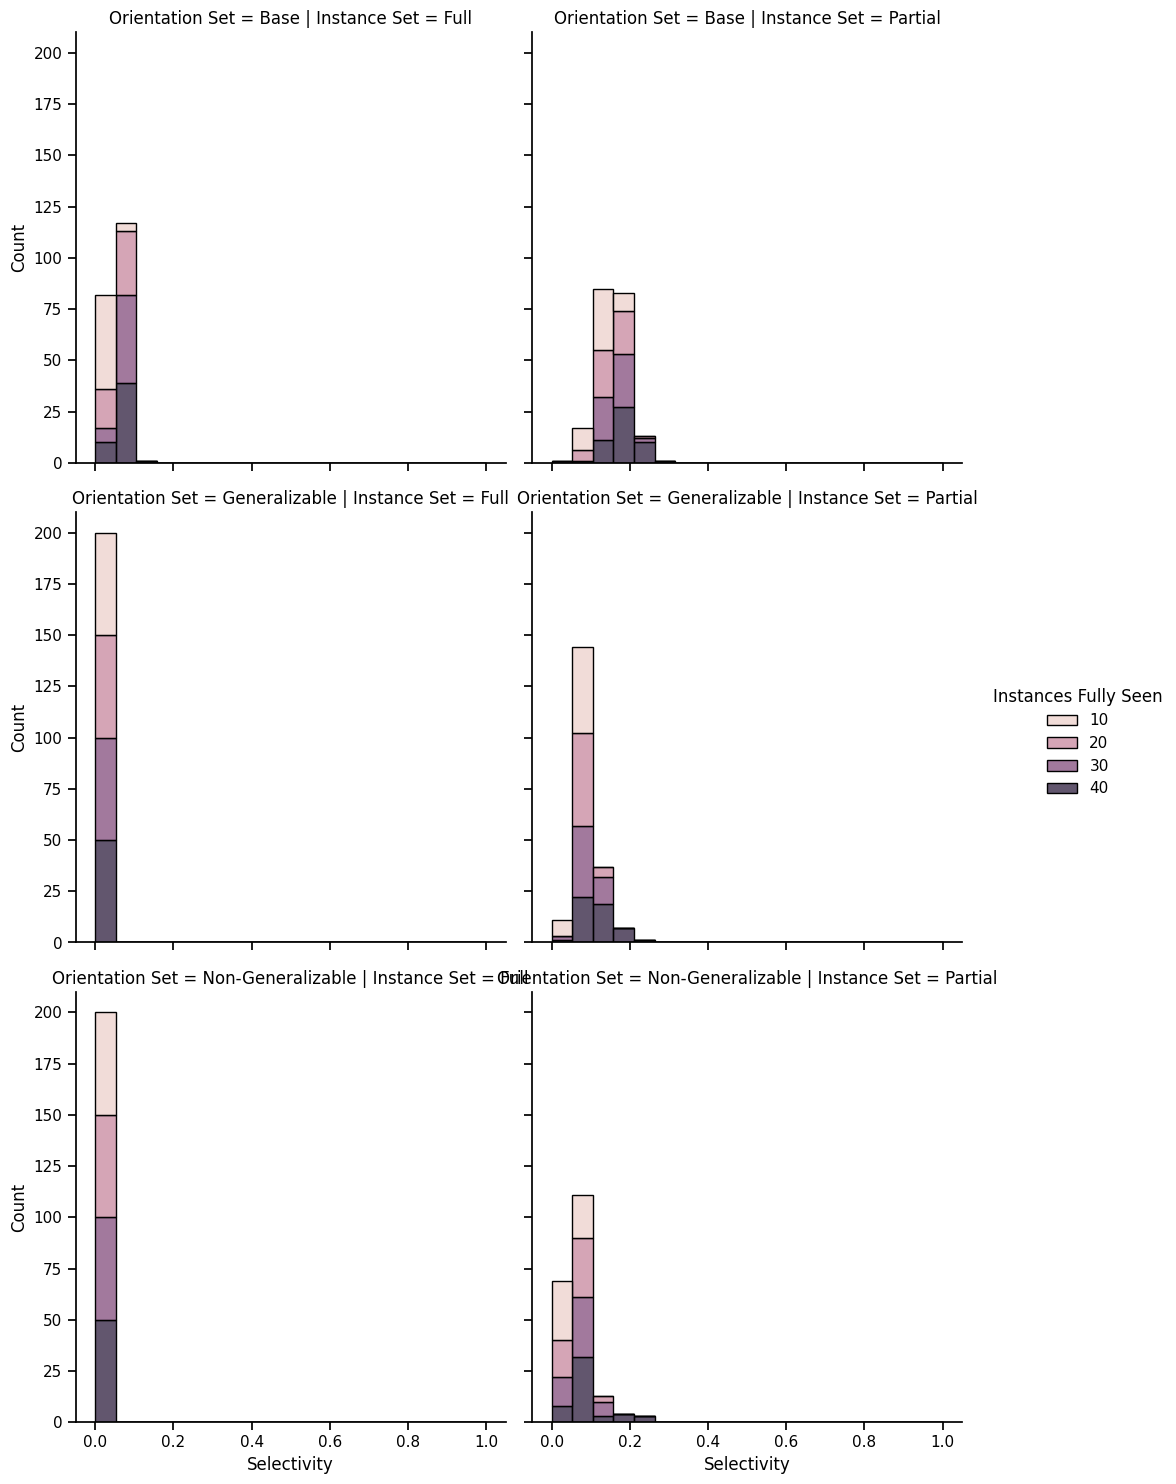

In [31]:
g = sns.displot(data=selectivity_frame,
       x='Selectivity',
        bins=np.linspace(0, 1, 20),
                row='Orientation Set',
       col='Instance Set',
       multiple='stack',
        hue='Instances Fully Seen')
# plt.savefig('selectivity.pdf', transparent=True)

In [9]:
a = invariances_frame[(invariances_frame['Instance Transform'] == 'Partial -> Partial') & (invariances_frame['Orientation Transform'] != 'Predicted -> Not-Predicted')].copy()

In [10]:
a['Orientation Set'] = a['Orientation Transform'].apply(lambda t: t[8:])

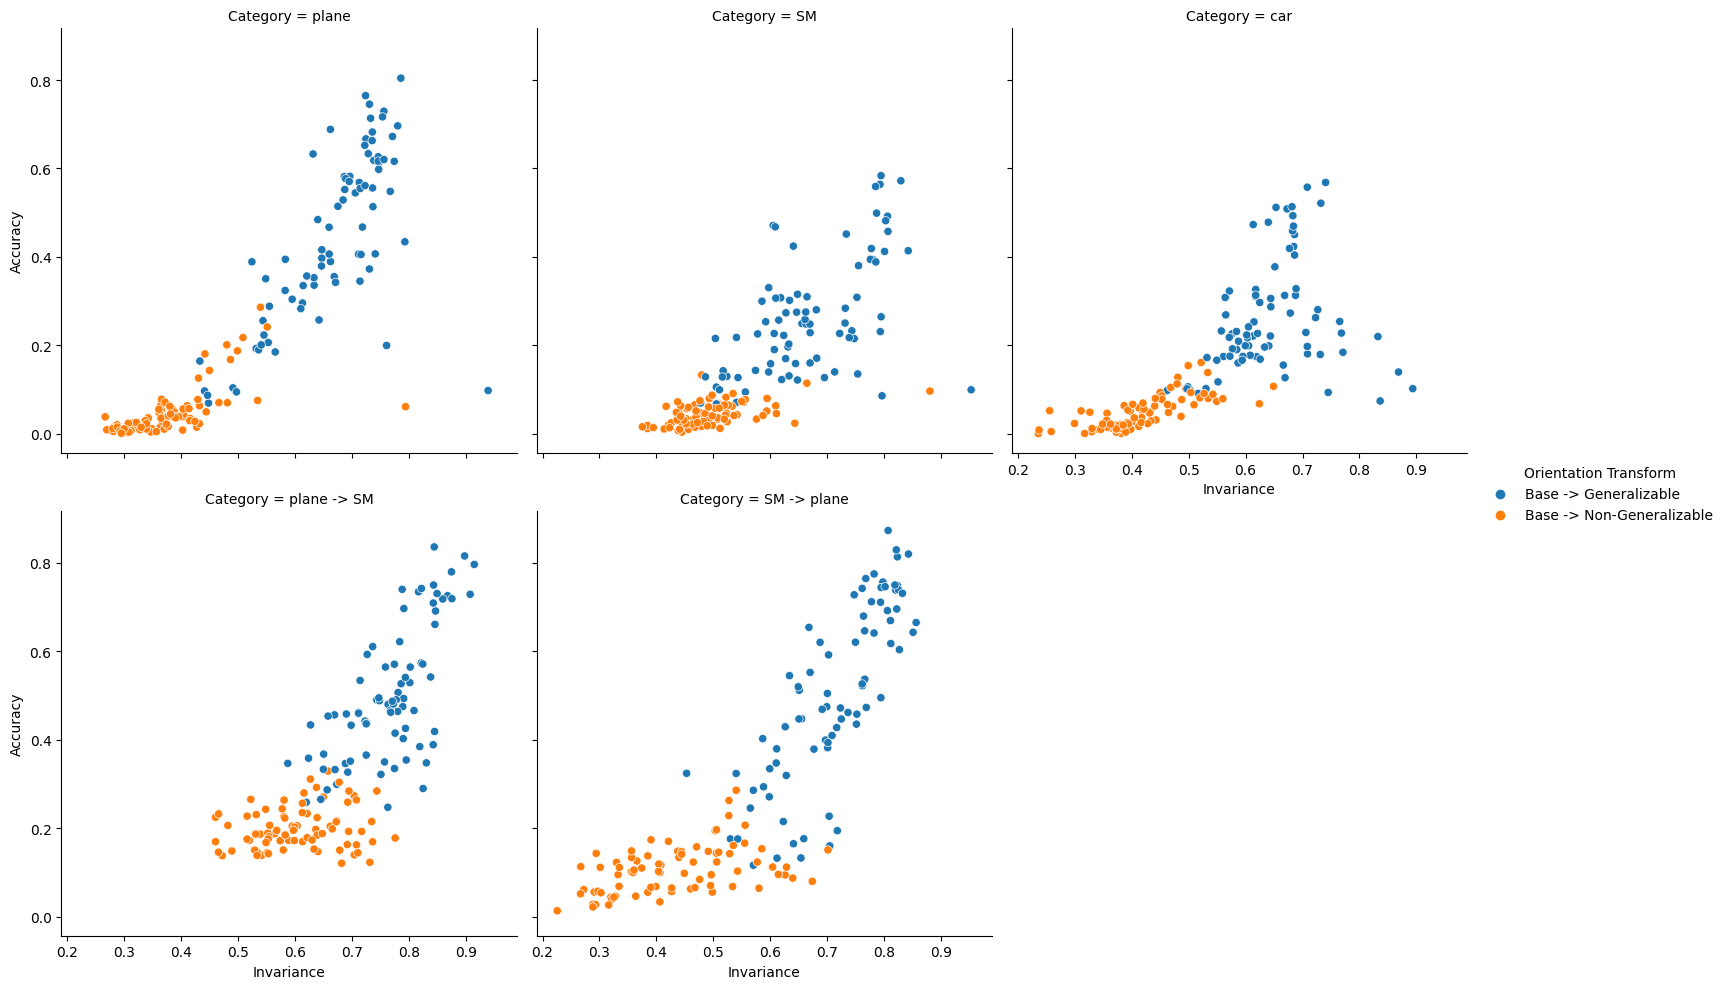

In [80]:
g = sns.relplot(kind='scatter',
            data=partial_accuracy_frame.merge(a).groupby(['Run', 'Orientation Set', 'Instances Fully Seen',
       'Free Axis', 'Category', 'Instance Transform', 'Orientation Transform']).mean().reset_index(),
            # data=accuracy_frame.merge(a),
            x='Invariance',
            y='Accuracy',
            hue='Orientation Transform',
                            col_order=['plane', 'SM', 'car', 'plane -> SM', 'SM -> plane'],
            col_wrap=3,
            col='Category'
           )
# sns.move_legend(g, "lower center", bbox_to_anchor=(0.4, -0.1))
# g.set(xscale='log', yscale='log')
# plt.setp(g.axes.flat, xlabel='')
# g.fig.supxlabel("Orientation Invariance for Partially Seen")
# plt.savefig('dist_acc.png', transparent=True, dpi=300)

In [96]:
b = invariances_frame[(invariances_frame['Instance Transform'] == 'Full -> Full') & (invariances_frame['Orientation Transform'] != 'Predicted -> Not-Predicted')].copy()

In [97]:
b['Orientation Set'] = b['Orientation Transform'].apply(lambda t: t[8:])

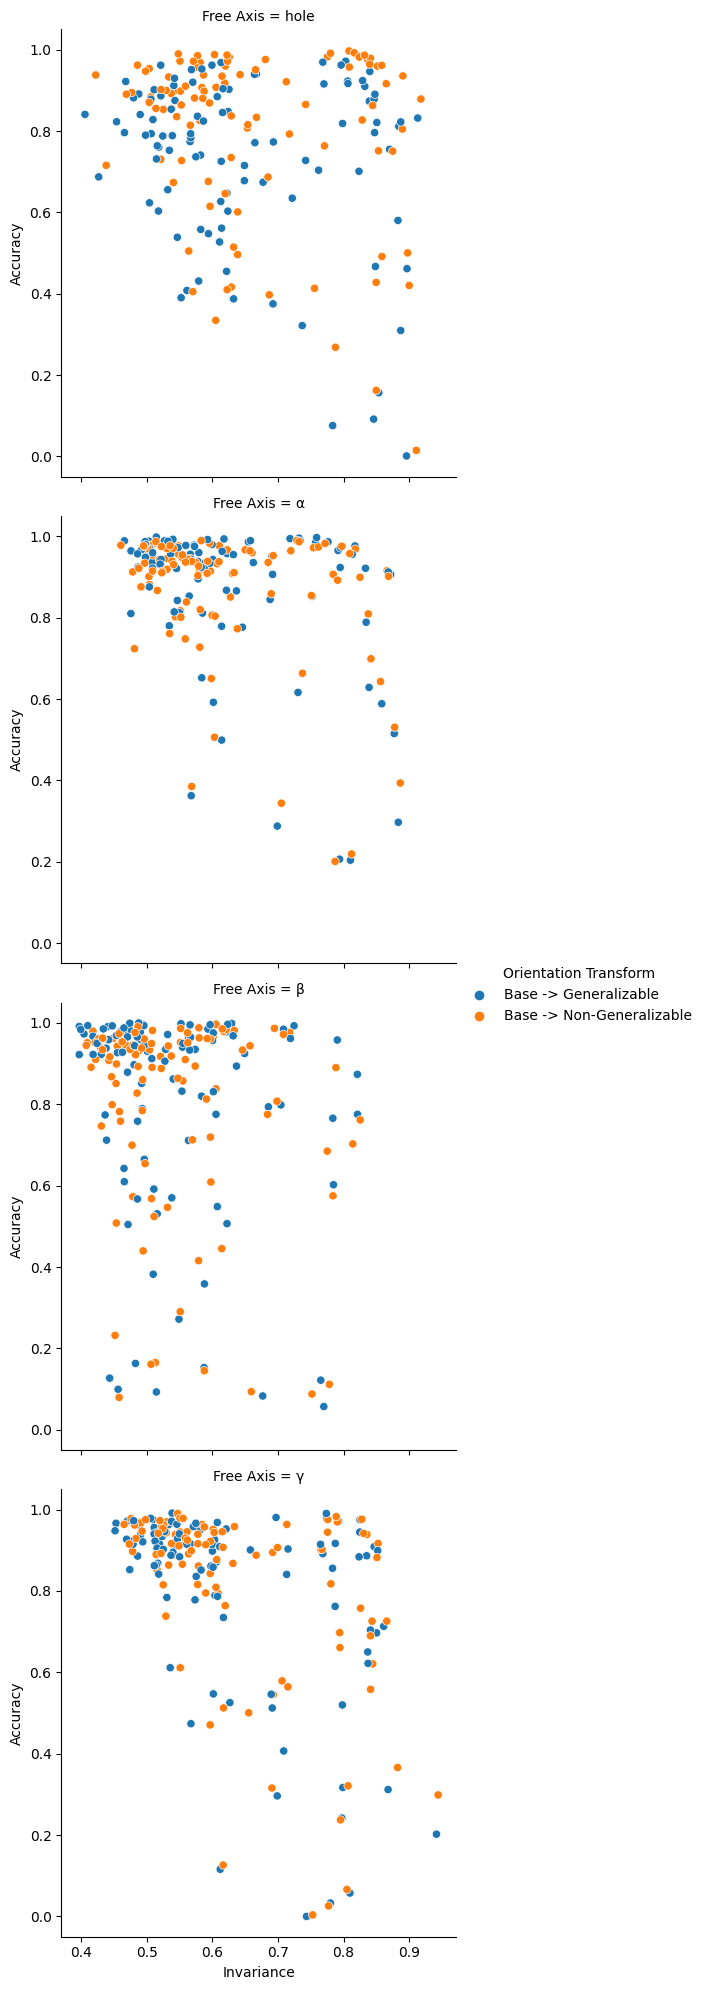

In [130]:
g = sns.relplot(kind='scatter',
            data=full_accuracy_frame.merge(b).groupby(['Run', 'Orientation Set', 'Instances Fully Seen',
       'Free Axis', 'Category', 'Instance Transform', 'Orientation Transform']).mean().reset_index(),
            # data=accuracy_frame.merge(a),
            x='Invariance',
            y='Accuracy',
            hue='Orientation Transform',
                            col_order=['plane', 'SM', 'car', 'plane -> SM', 'SM -> plane'],
            row='Free Axis',
                # style='Free Axis'
           )
# sns.move_legend(g, "lower center", bbox_to_anchor=(0.4, -0.1))
# g.set(xscale='log', yscale='log')
# plt.setp(g.axes.flat, xlabel='')
# g.fig.supxlabel("Orientation Invariance for Partially Seen")
# plt.savefig('dist_acc.png', transparent=True, dpi=300)

In [11]:
a['Hue String'] = a.apply(lambda row: row['Orientation Transform'] + (',   Cross-Entropy' if row['Num'] == 0 else ',   Contrastive'), axis=1)

In [12]:
a['Hue String'].unique()

array(['Base -> Generalizable,   Cross-Entropy',
       'Base -> Non-Generalizable,   Cross-Entropy',
       'Generalizable -> Non-Generalizable,   Cross-Entropy',
       'Base -> Generalizable,   Contrastive',
       'Base -> Non-Generalizable,   Contrastive',
       'Generalizable -> Non-Generalizable,   Contrastive'], dtype=object)

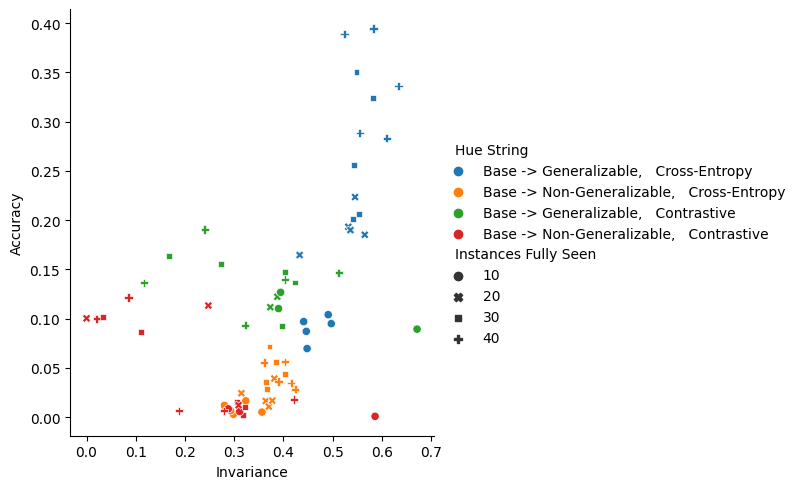

In [16]:
g = sns.relplot(kind='scatter',
       #      data=partial_accuracy_frame.merge(a).groupby(['Orientation Set', 'Instances Fully Seen',
       # 'Free Axis', 'Category', 'Instance Transform', 'Orientation Transform', 'Num', 'Hue String']).mean().reset_index(),
            data=partial_accuracy_frame.merge(a),
            style='Instances Fully Seen',
            x='Invariance',
            y='Accuracy',
            hue='Hue String',
            hue_order=['Base -> Generalizable,   Cross-Entropy',
       'Base -> Non-Generalizable,   Cross-Entropy',
       'Base -> Generalizable,   Contrastive',
       'Base -> Non-Generalizable,   Contrastive']
           )

In [178]:
a = invariances_frame[(invariances_frame['Instance Transform'] == 'Full -> Partial') & (invariances_frame['Orientation Transform'].isin(['Base -> Base', 'Generalizable -> Generalizable', 'Non-Generalizable -> Non-Generalizable']))].copy()

In [179]:
a['Orientation Set'] = a['Orientation Transform'].apply(lambda t: t.split(' ')[0])
a = a.rename({'Invariance': 'Mixed Selectivity'}, axis=1)
a['Loss'] = a.Num.apply(lambda num: 'Cross Entropy' if num == 0 else 'Contrastive')

<AxesSubplot:xlabel='Instances Fully Seen', ylabel='Mixed Selectivity'>

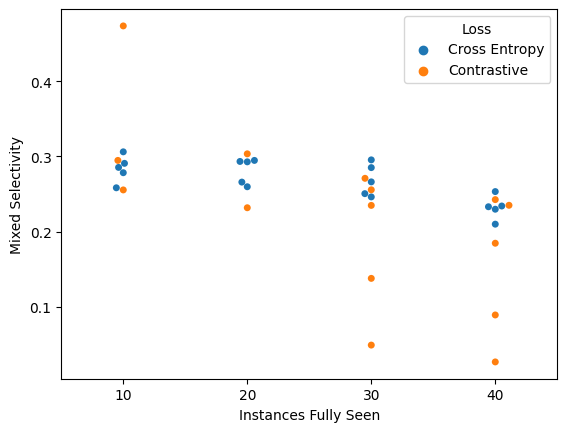

In [180]:
sns.swarmplot(data=a[a['Orientation Transform'] == 'Base -> Base'],
               y='Mixed Selectivity',
               x='Instances Fully Seen',
             hue='Loss')

In [169]:
g = sns.relplot(kind='scatter',
            data=accuracy_frame.merge(a).groupby(['Orientation Set', 'Instances Fully Seen',
       'Free Axis', 'Category', 'Instance Transform', 'Orientation Transform']).mean().reset_index(),
            # data=accuracy_frame.merge(a),
            x='Mixed Selectivity',
            y='Accuracy',
            hue='Orientation Transform',
                hue_order=['Generalizable -> Generalizable', 'Non-Generalizable -> Non-Generalizable', 'Base -> Base'],
            # row='Category',
            # col='Free Axis',
            style='Instances Fully Seen',
                # col='Orientation Transform'
           )

NameError: name 'accuracy_frame' is not defined

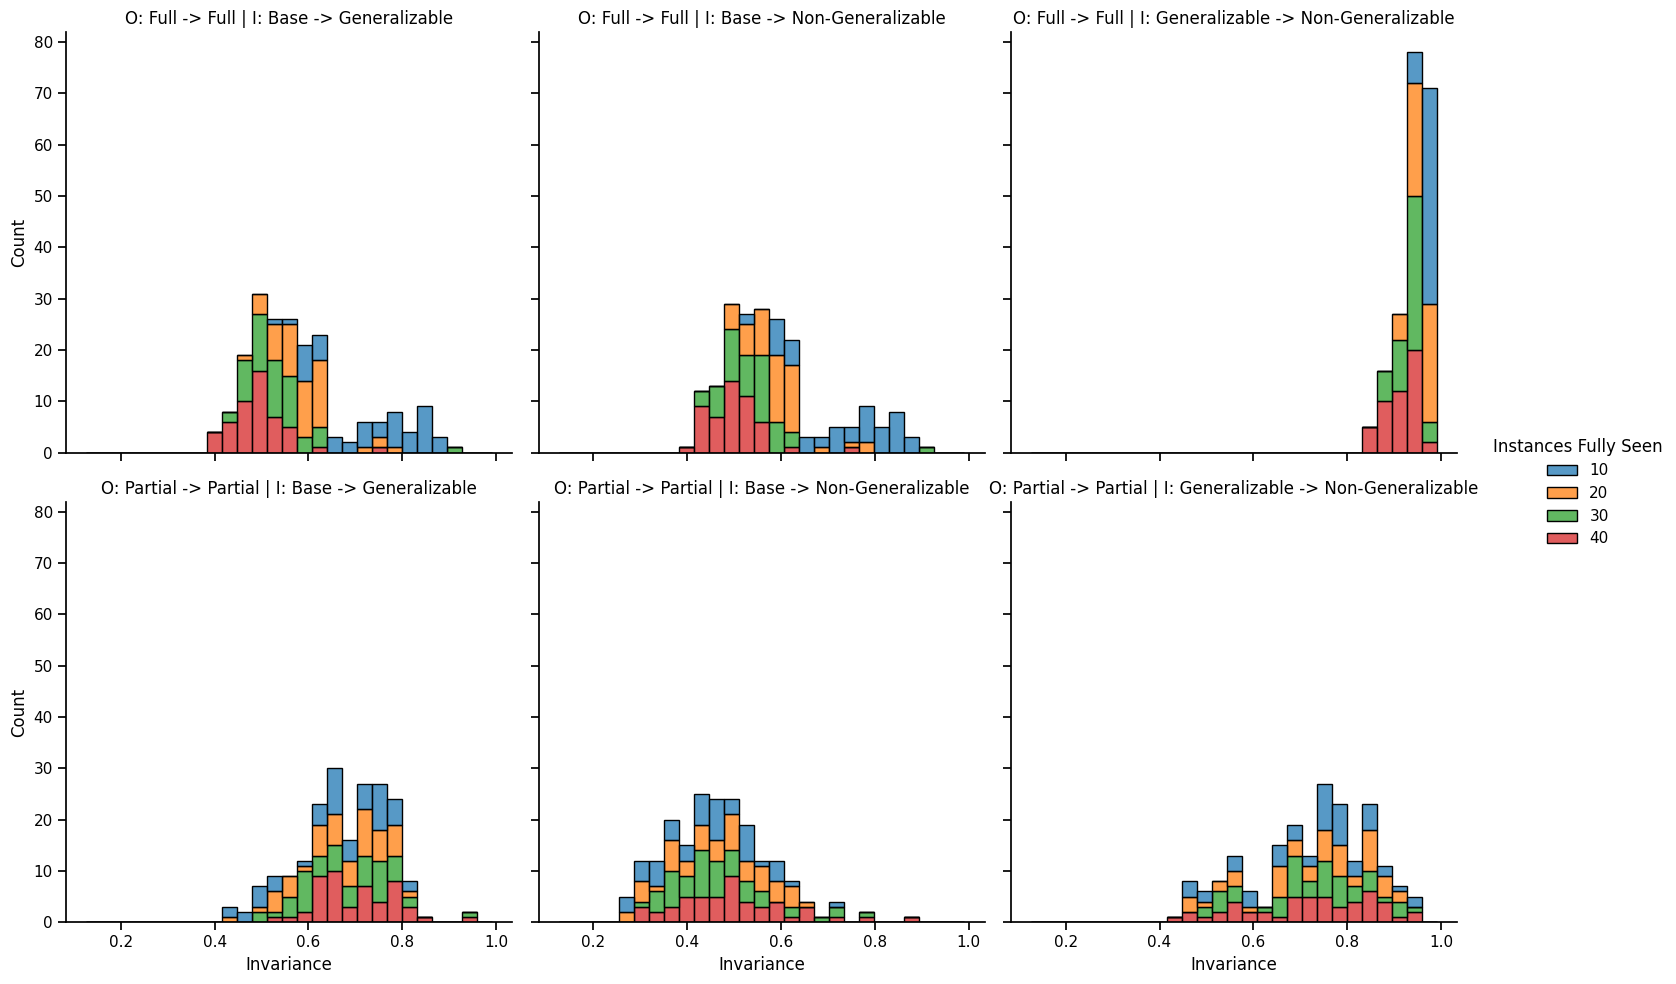

In [32]:
g = sns.displot(data=invariances_frame.astype({'Instances Fully Seen': 'category'}),
            x='Invariance',
            row='Instance Transform',
            row_order=['Full -> Full', 'Partial -> Partial'],
            col='Orientation Transform',
                col_order=['Base -> Generalizable', 'Base -> Non-Generalizable', 'Generalizable -> Non-Generalizable'],
                 hue='Instances Fully Seen',
                multiple='stack'
            # col='Free Axis
           )
g.set_titles(row_template = 'O: {row_name}', col_template = 'I: {col_name}')
# plt.setp(g.axes.flat, xlabel='')
# g.fig.supxlabel("Orientation Invariance for Partially Seen")
# plt.savefig('dist_acc.png', transparent=True, dpi=300)

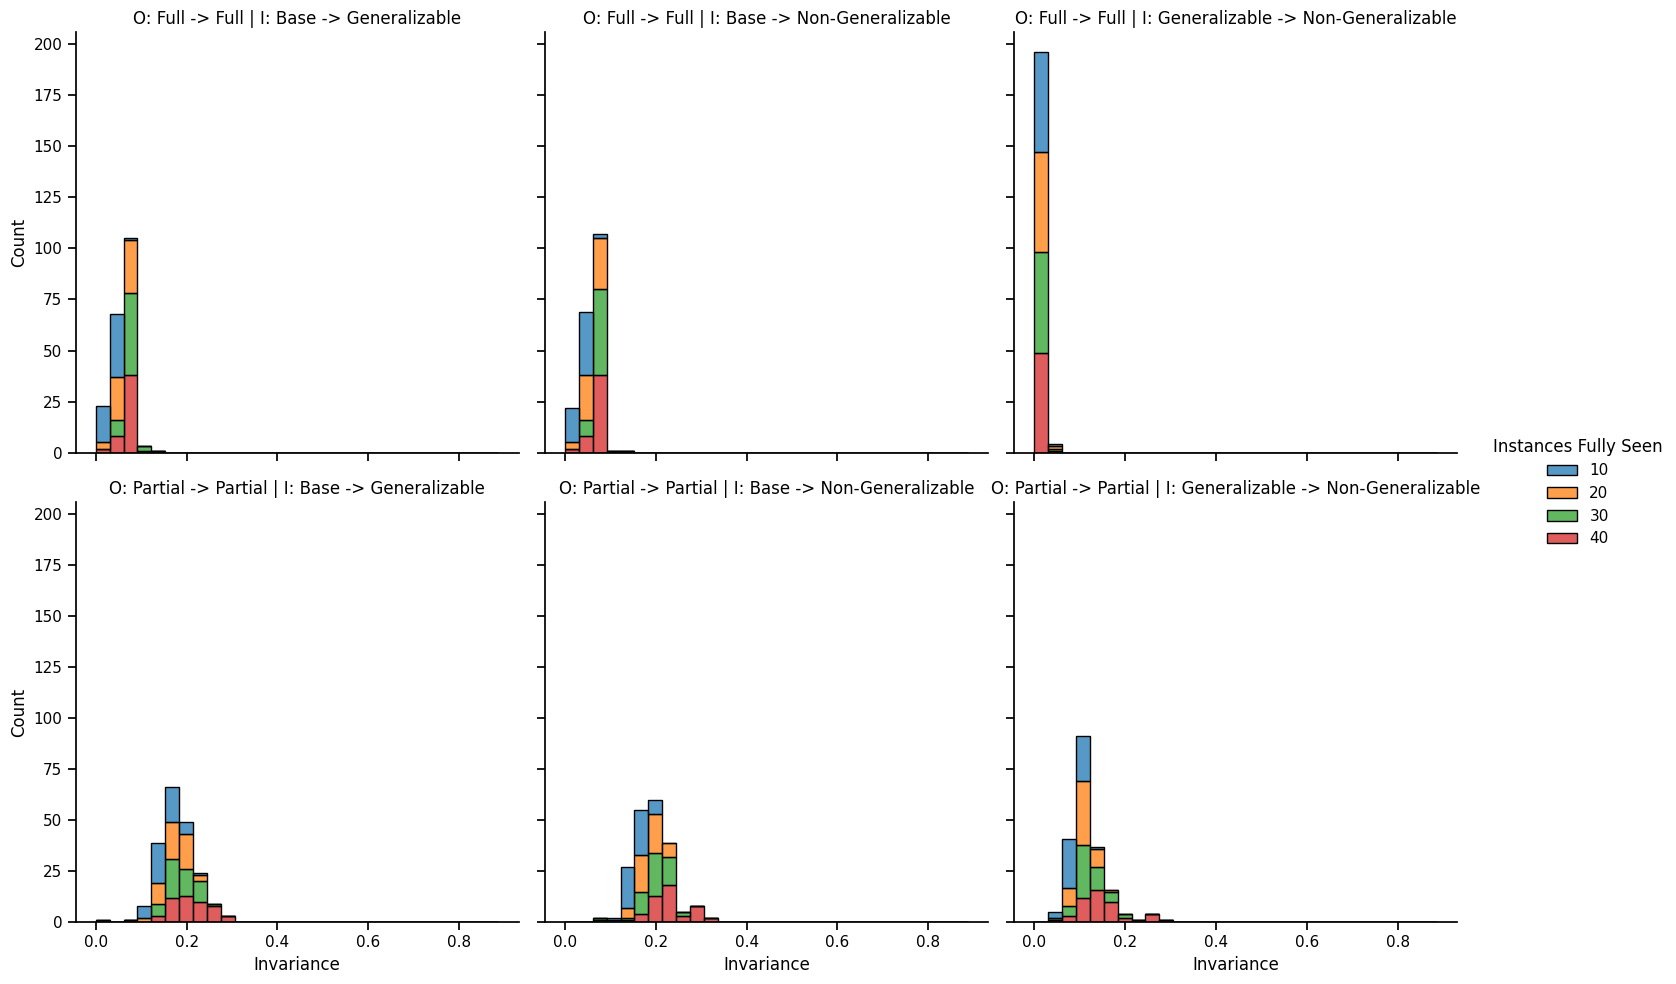

In [33]:
g = sns.displot(data=invariances_nans_frame.astype({'Instances Fully Seen': 'category'}),
            x='Invariance',
            row='Instance Transform',
            row_order=['Full -> Full', 'Partial -> Partial'],
            col='Orientation Transform',
                col_order=['Base -> Generalizable', 'Base -> Non-Generalizable', 'Generalizable -> Non-Generalizable'],
                 hue='Instances Fully Seen',
                multiple='stack'
            # col='Free Axis
           )
g.set_titles(row_template = 'O: {row_name}', col_template = 'I: {col_name}')
# plt.setp(g.axes.flat, xlabel='')
# g.fig.supxlabel("Orientation Invariance for Partially Seen")
# plt.savefig('dist_acc.png', transparent=True, dpi=300)

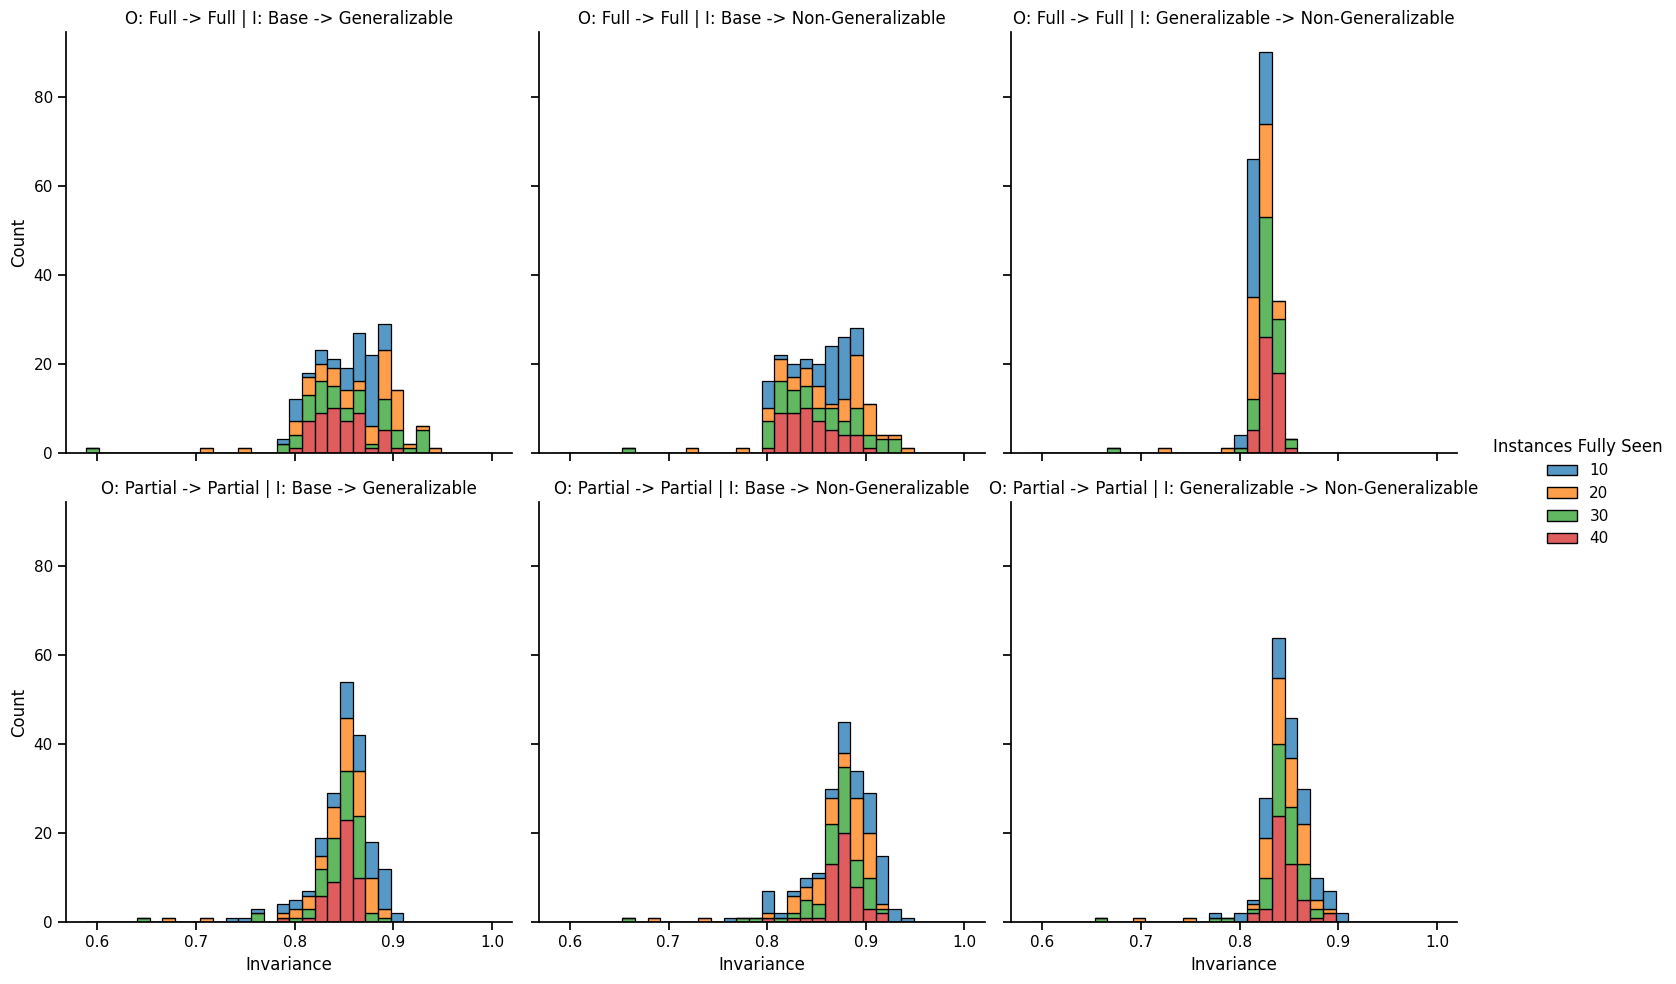

In [27]:
g = sns.displot(data=invariances_nans_frame.astype({'Instances Fully Seen': 'category'}),
            x='Invariance',
            row='Instance Transform',
            row_order=['Full -> Full', 'Partial -> Partial'],
            col='Orientation Transform',
                col_order=['Base -> Generalizable', 'Base -> Non-Generalizable', 'Generalizable -> Non-Generalizable'],
                 hue='Instances Fully Seen',
                multiple='stack'
            # col='Free Axis
           )
g.set_titles(row_template = 'O: {row_name}', col_template = 'I: {col_name}')
# plt.setp(g.axes.flat, xlabel='')
# g.fig.supxlabel("Orientation Invariance for Partially Seen")
# plt.savefig('dist_acc.png', transparent=True, dpi=300)

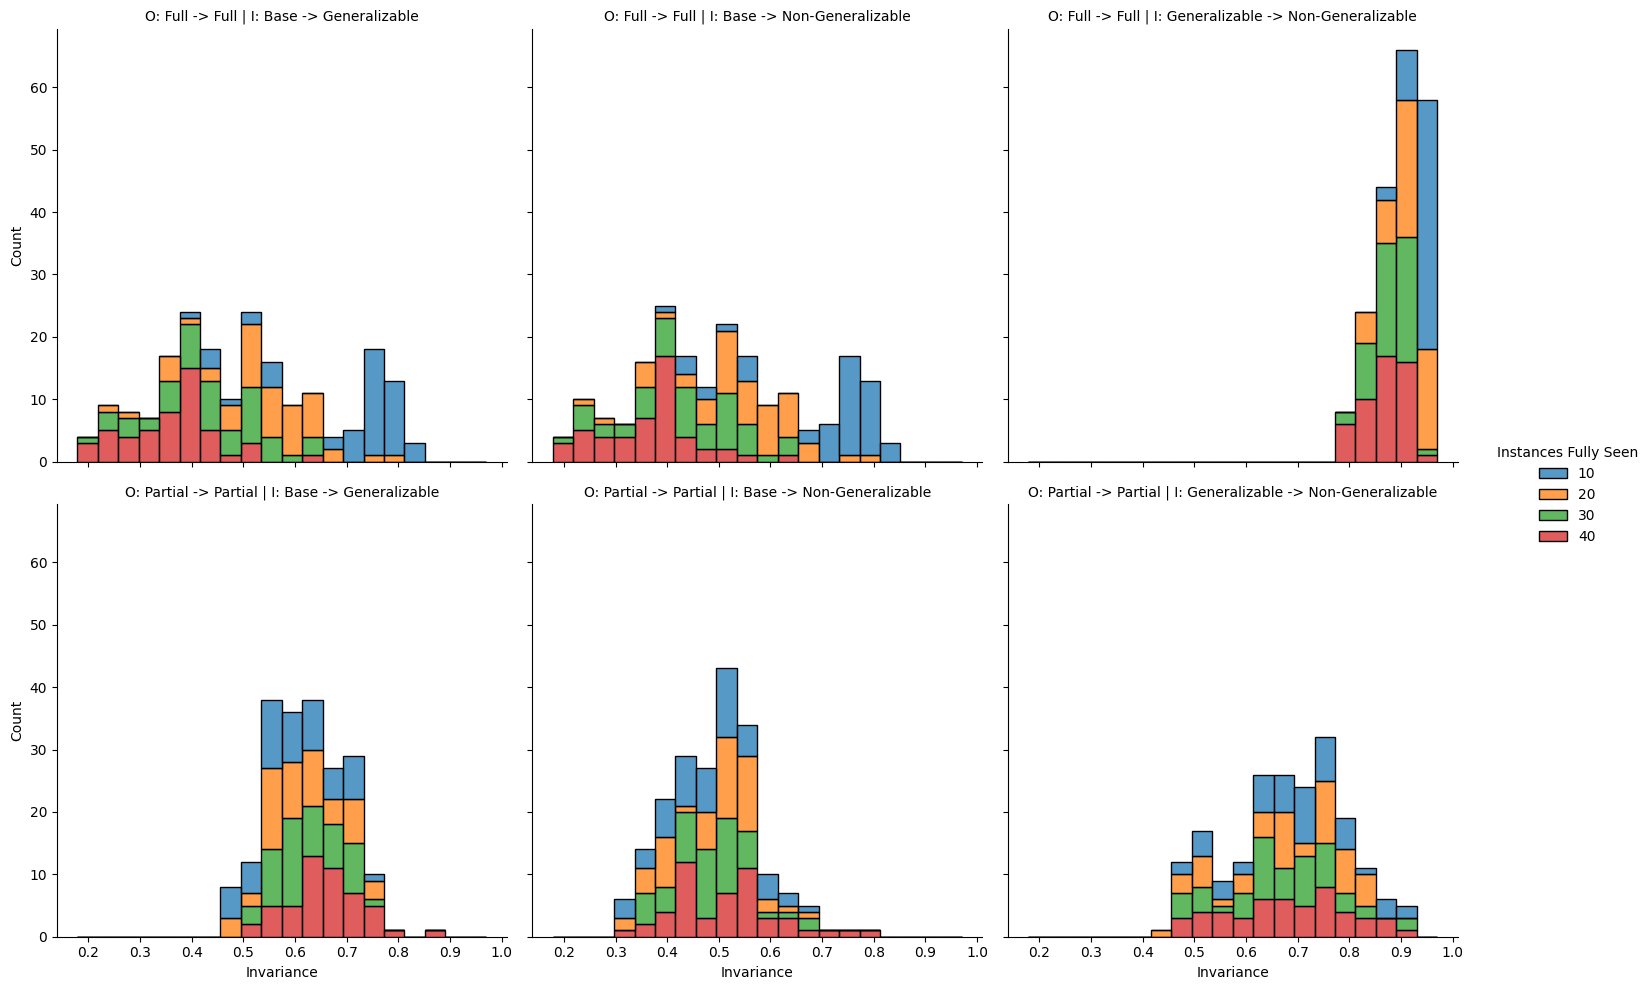

In [49]:
g = sns.displot(data=invariances_frame.astype({'Instances Fully Seen': 'category'}),
            x='Invariance',
            row='Instance Transform',
            row_order=['Full -> Full', 'Partial -> Partial'],
            col='Orientation Transform',
                col_order=['Base -> Generalizable', 'Base -> Non-Generalizable', 'Generalizable -> Non-Generalizable'],
                 hue='Instances Fully Seen',
                multiple='stack'
            # col='Free Axis
           )
g.set_titles(row_template = 'O: {row_name}', col_template = 'I: {col_name}')
# plt.setp(g.axes.flat, xlabel='')
# g.fig.supxlabel("Orientation Invariance for Partially Seen")
# plt.savefig('dist_acc.png', transparent=True, dpi=300)

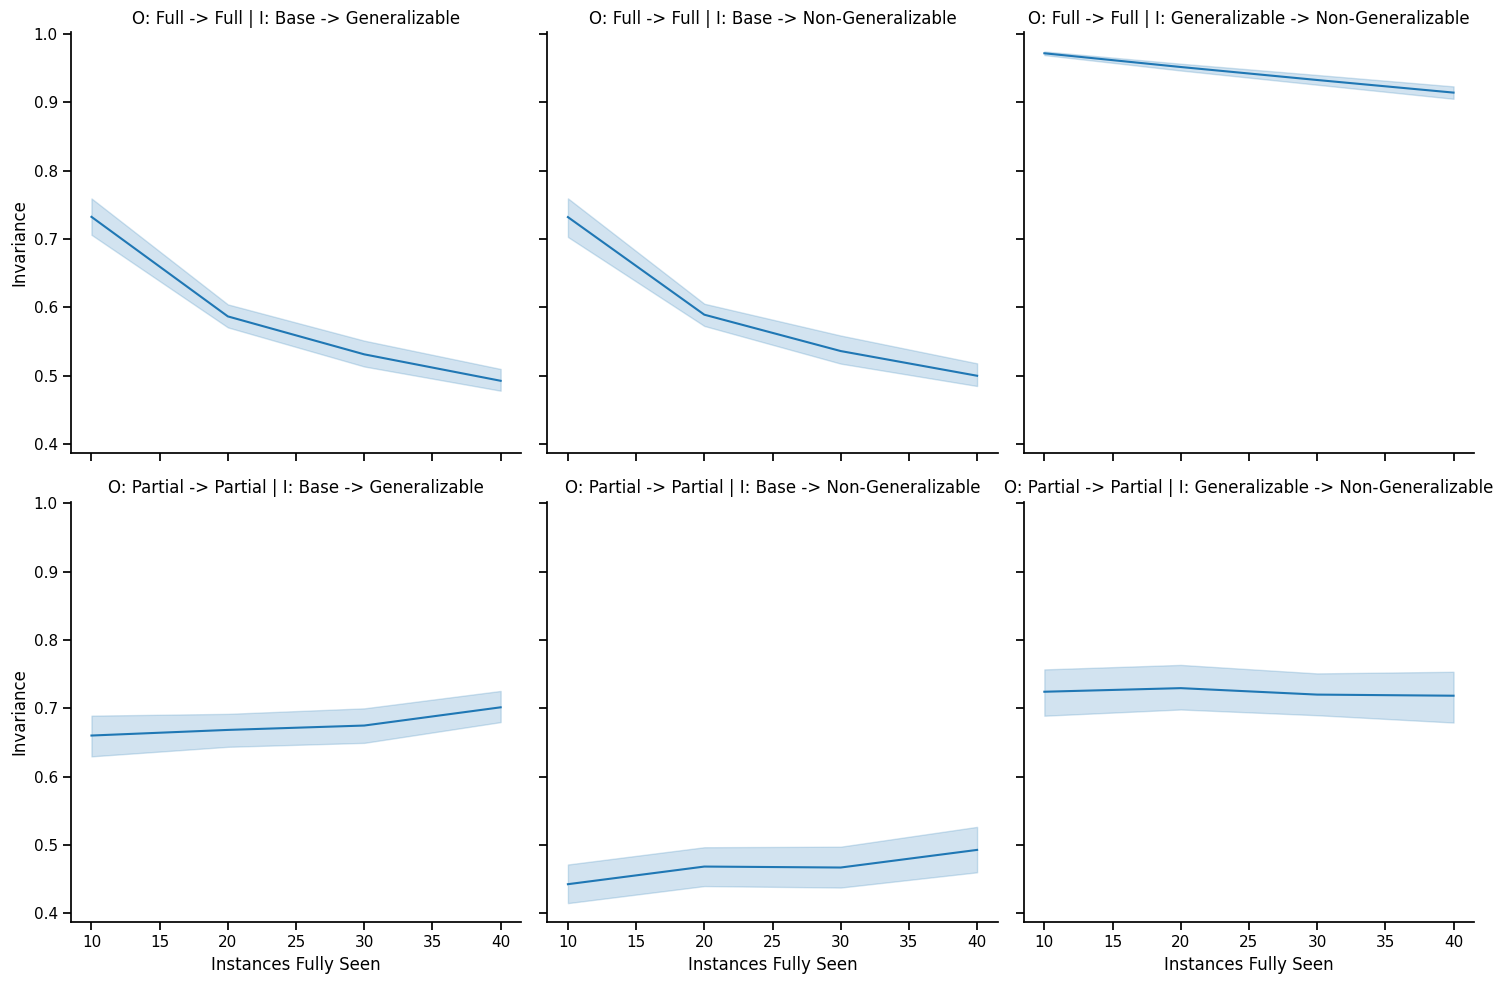

In [41]:
g = sns.relplot(kind='line',
            data=invariances_frame.astype({'Instances Fully Seen': 'category'}),
            x='Instances Fully Seen',
            y='Invariance',
            row='Instance Transform',
            row_order=['Full -> Full', 'Partial -> Partial'],
            col='Orientation Transform',
                col_order=['Base -> Generalizable', 'Base -> Non-Generalizable', 'Generalizable -> Non-Generalizable'])
g.set_titles(row_template = 'O: {row_name}', col_template = 'I: {col_name}')

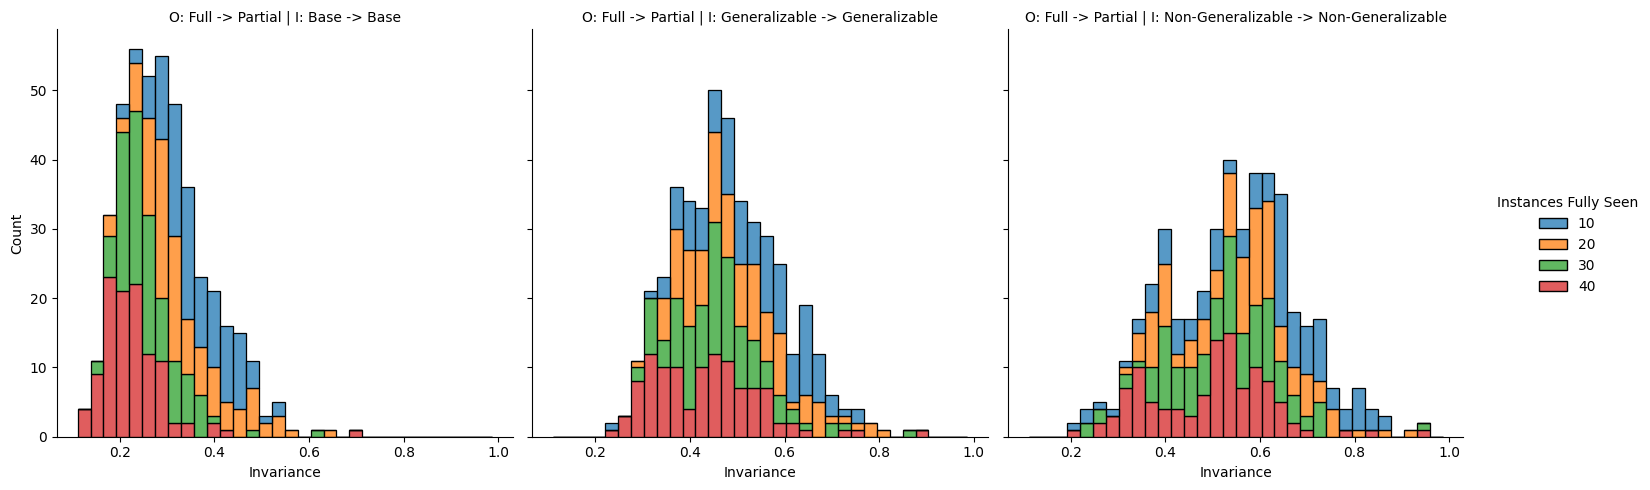

In [96]:
g = sns.displot(data=invariances_frame.astype({'Instances Fully Seen': 'category'}),
            x='Invariance',
            row='Instance Transform',
            row_order=['Full -> Partial'],
            # row='Instances Fully Seen',
            col='Orientation Transform',
            col_order=['Base -> Base', 'Generalizable -> Generalizable', 'Non-Generalizable -> Non-Generalizable'],
            hue='Instances Fully Seen',
                multiple='stack'
            # col='Free Axis
           )
g.set_titles(row_template = 'O: {row_name}', col_template = 'I: {col_name}')

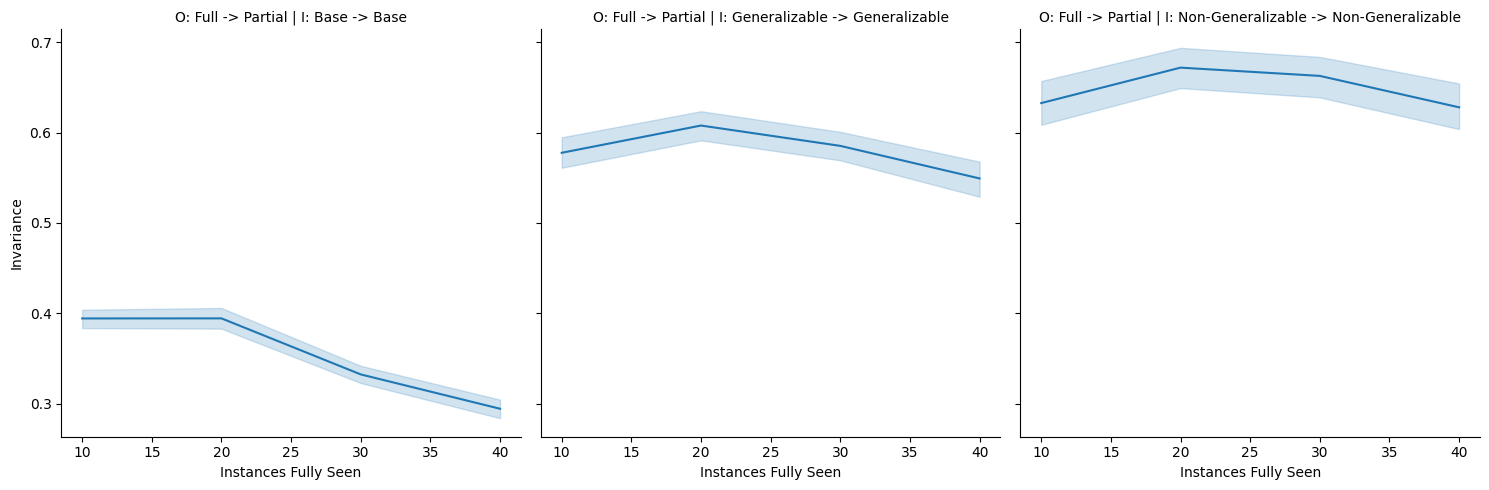

In [31]:
g = sns.relplot(kind='line',
            data=invariances_frame.astype({'Instances Fully Seen': 'category'}),
            x='Instances Fully Seen',
            y='Invariance',
            row='Instance Transform',
            row_order=['Full -> Partial'],
            col='Orientation Transform',
            col_order=['Base -> Base', 'Generalizable -> Generalizable', 'Non-Generalizable -> Non-Generalizable'])
g.set_titles(row_template = 'O: {row_name}', col_template = 'I: {col_name}')

In [ ]:
g = sns.relplot(kind='line',
            data=invariances_frame.astype({'Instances Fully Seen': 'category'}),
            x='Instances Fully Seen',
            y='Invariance',
            row='Instance Transform',
            row_order=['Full -> Partial'],
            col='Orientation Transform',
            col_order=['Base -> Base', 'Generalizable -> Generalizable', 'Non-Generalizable -> Non-Generalizable'])
g.set_titles(row_template = 'O: {row_name}', col_template = 'I: {col_name}')

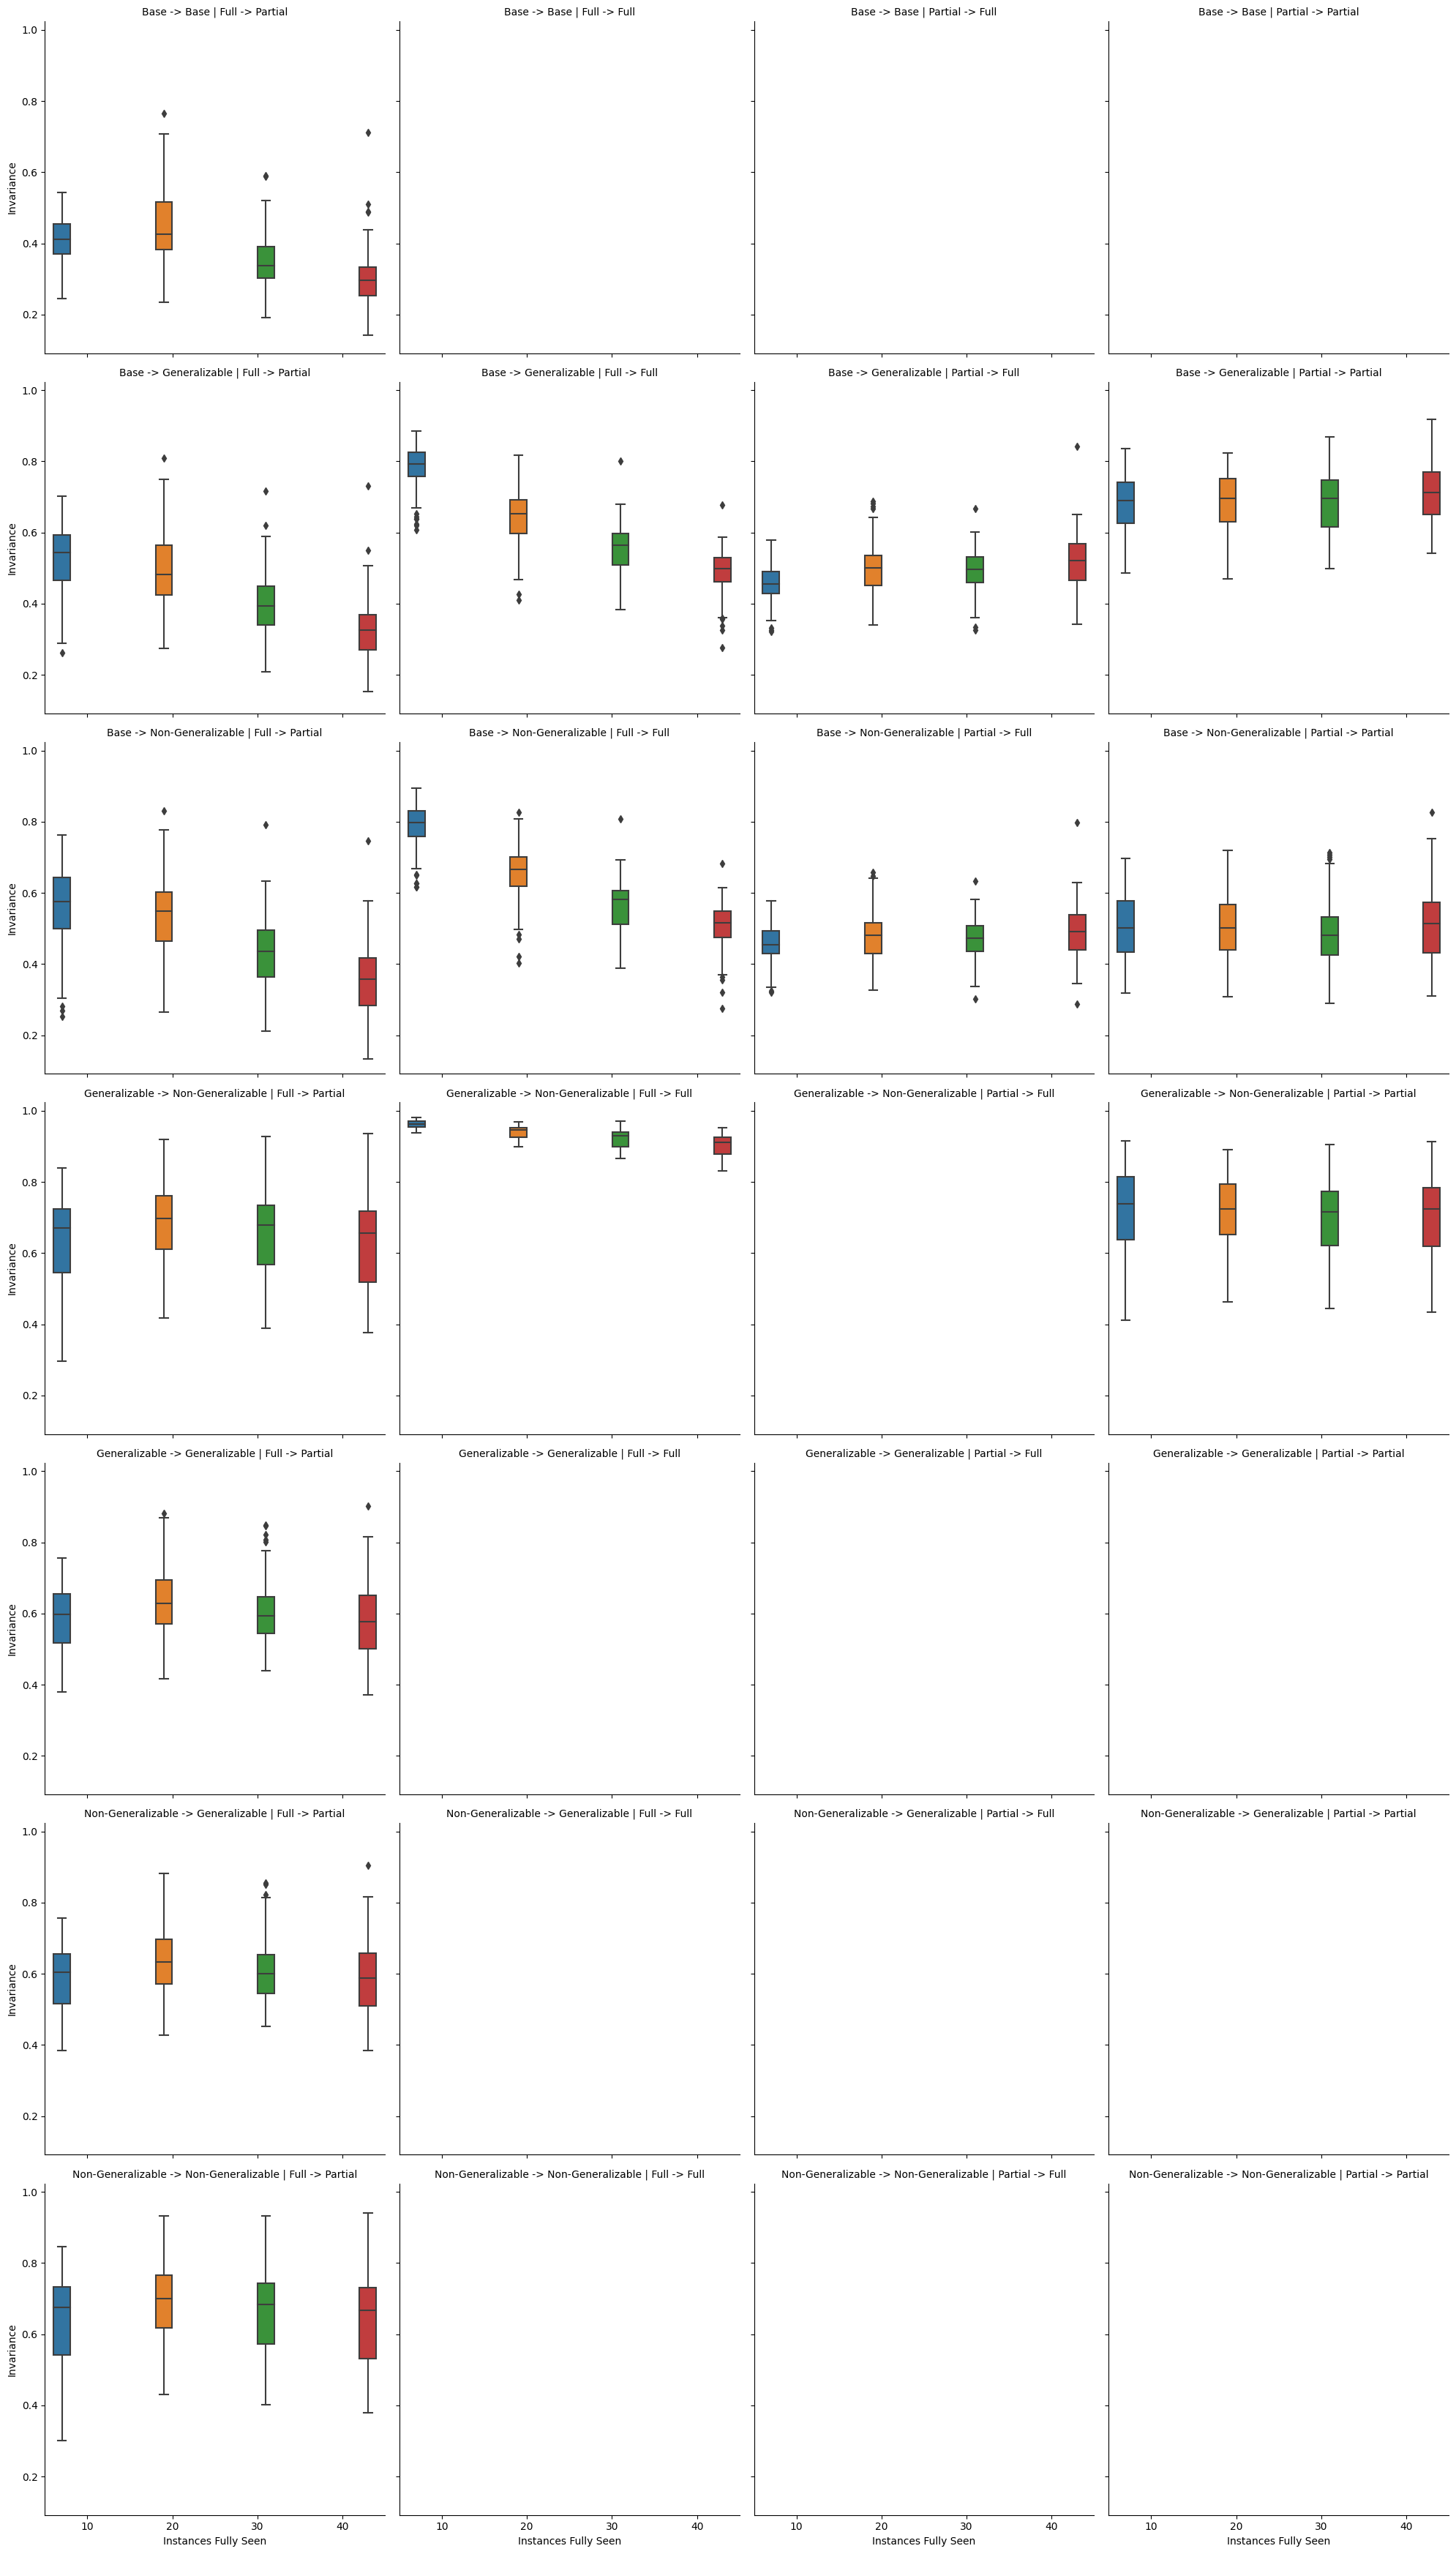

In [22]:
g = sns.catplot(kind='box',
            data=invariances_frame,
            hue='Instances Fully Seen',
            col='Instance Transform',
            row='Orientation Transform',
            x='Instances Fully Seen',
           y='Invariance')
g.set_titles(row_template = '{row_name}', col_template = '{col_name}')